# Applied Machine Learning Project

# Personality Type Categorization Using Big Five Questionnaire Dataset



### Overview 

This project is an approach to successfully classify a population into distinct groups of personality traits. The dataset was taken from Kaggle ( __[Big Five Personality Test](https://www.kaggle.com/tunguz/big-five-personality-test)__ ),which includes 10 distinct questions for each trait criteria. The answers to the overall 50 questions are recorded on a scale of 1 to 5. 1 meaning highly disagree and 5 meaning highly agree.


### Importing and Reading Data (Preprocessing)

We start off by importing all the required libraries and read in the csv file into a DataFrame and collect insight as to what information does the DataFrame have and how it is oriented. 
We also have a brief description of the questions below.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("data-final.csv",sep = '\t',engine = 'python', error_bad_lines = False)
information = open('codebook.txt','r')
print(information.read())

In [2]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [3]:
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,...,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013275e+06,1.013275e+06,1.013275e+06,1.013558e+06,1.015341e+06,1.015341e+06
mean,2.648067e+00,2.773115e+00,3.288349e+00,3.140595e+00,3.276960e+00,2.401100e+00,2.771744e+00,3.414818e+00,2.963740e+00,3.556469e+00,...,7.689488e+03,5.423945e+03,6.325802e+03,5.336311e+03,1.149510e+03,8.262611e+02,9.590748e+02,6.754233e+02,2.701410e+03,1.045211e+01
std,1.264407e+00,1.323943e+00,1.215006e+00,1.237442e+00,1.277593e+00,1.225721e+00,1.400336e+00,1.271915e+00,1.346040e+00,1.305232e+00,...,5.841987e+05,2.629748e+05,4.298906e+05,4.408225e+05,5.600884e+02,1.802490e+02,5.104005e+04,2.017864e+04,1.483898e+06,3.982879e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-6.181300e+04,-5.001200e+04,-9.598600e+04,-3.594871e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,2.279000e+03,2.144000e+03,2.329000e+03,1.484000e+03,4.140000e+02,7.200000e+02,5.000000e+00,1.710000e+02,9.000000e+00,1.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,3.208000e+03,3.051000e+03,3.269000e+03,2.192000e+03,1.366000e+03,7.680000e+02,1.000000e+01,2.240000e+02,1.300000e+01,1.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,4.729000e+03,4.469000e+03,4.785000e+03,3.362000e+03,1.440000e+03,9.000000e+02,3.000000e+01,3.130000e+02,1.800000e+01,2.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,3.891434e+08,1.696693e+08,3.470326e+08,3.344289e+08,1.366000e+04,8.802000e+03,2.944307e+07,1.189272e+07,1.493327e+09,7.250000e+02


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


In [5]:
data.values

array([[4.0, 1.0, 5.0, ..., 'GB', '51.5448', '0.1991'],
       [3.0, 5.0, 3.0, ..., 'MY', '3.1698', '101.706'],
       [2.0, 3.0, 4.0, ..., 'GB', '54.9119', '-1.3833'],
       ...,
       [4.0, 2.0, 4.0, ..., 'US', '36.1473', '-86.777'],
       [2.0, 4.0, 3.0, ..., 'US', '34.1067', '-117.8067'],
       [4.0, 2.0, 4.0, ..., 'US', '38.0', '-97.0']], dtype=object)

In [6]:
data.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

Since the data contains information about the users' hardware, location etc. We will remove those columns and only use the first 50 columns which have the answers recorded. 

#### Note:
<b>The dataset also contains information about how much time it took for the user to respond to the particular question. We will ignore this data for now, but this data can be assigned different weights to conceptualize that lesser time taken to respond can mean that the user is more confident about the answer choice.</b>

In [7]:
data_ques = data.iloc[:,:50]

Then we continue with finding null values and removing the rows that are responisble for the same. We see below that there are not many rows containing N/A(1783 out 1 million).
We can remove these rows without compromising the dataset.

In [8]:
data_ques.isnull().sum()

EXT1     1783
EXT2     1783
EXT3     1783
EXT4     1783
EXT5     1783
EXT6     1783
EXT7     1783
EXT8     1783
EXT9     1783
EXT10    1783
EST1     1783
EST2     1783
EST3     1783
EST4     1783
EST5     1783
EST6     1783
EST7     1783
EST8     1783
EST9     1783
EST10    1783
AGR1     1783
AGR2     1783
AGR3     1783
AGR4     1783
AGR5     1783
AGR6     1783
AGR7     1783
AGR8     1783
AGR9     1783
AGR10    1783
CSN1     1783
CSN2     1783
CSN3     1783
CSN4     1783
CSN5     1783
CSN6     1783
CSN7     1783
CSN8     1783
CSN9     1783
CSN10    1783
OPN1     1783
OPN2     1783
OPN3     1783
OPN4     1783
OPN5     1783
OPN6     1783
OPN7     1783
OPN8     1783
OPN9     1783
OPN10    1783
dtype: int64

In [9]:
data_ques = data_ques.dropna(axis = 0)

In [10]:
data_ques.isnull().sum()

EXT1     0
EXT2     0
EXT3     0
EXT4     0
EXT5     0
EXT6     0
EXT7     0
EXT8     0
EXT9     0
EXT10    0
EST1     0
EST2     0
EST3     0
EST4     0
EST5     0
EST6     0
EST7     0
EST8     0
EST9     0
EST10    0
AGR1     0
AGR2     0
AGR3     0
AGR4     0
AGR5     0
AGR6     0
AGR7     0
AGR8     0
AGR9     0
AGR10    0
CSN1     0
CSN2     0
CSN3     0
CSN4     0
CSN5     0
CSN6     0
CSN7     0
CSN8     0
CSN9     0
CSN10    0
OPN1     0
OPN2     0
OPN3     0
OPN4     0
OPN5     0
OPN6     0
OPN7     0
OPN8     0
OPN9     0
OPN10    0
dtype: int64

In [11]:
data_ques.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


Next, we keep this processed data on the side as a template for our requirements and create another copy of the same dataset. Using MinMaxScaler, we normalise the readings to range from (0,1), and instantiate KMeans without setting any k value. KElbowVisualizer is used to create an elbow plot and find the optimal value for k. This comes out to be 5. 
The optimal value of k is increasing with the inrease in sample size used to create the elbow plot. 
We will be using value of k = 5. The second value for k can be chosen as 10 assuming the possibility of sub-categorical similarities between the polarized traits.

In [12]:
data1 = data.dropna(axis = 0)
data1 = data1.iloc[:,:50]


In [13]:
columns = list(data1.columns)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
data1 = scaler.fit_transform(data1)
data1 = pd.DataFrame(data1,columns = columns)

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

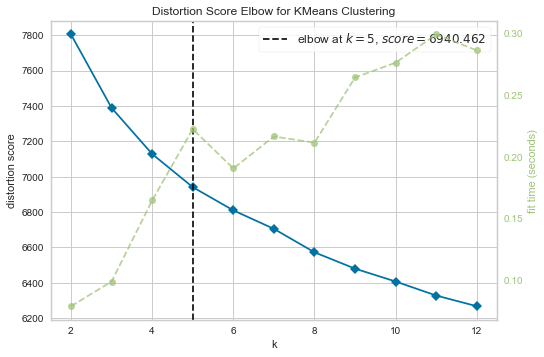

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,13))
visualizer.fit(data1.iloc[:3000,:])
visualizer.show(outpath = "KElbowplot.png")

KMeans is then used with k = 5 and each data entry is assigned to a group. The next step is to take the average for the 10 questions of each personality trait. After acquiring an average score for each person to a given trait, we group the DataFrame cluster-wise and calculate the mean score of each trait for all the clusters.

In [37]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data1)

clusters_ = k_fit.labels_
data1_pca_ready = data1
data1['Clusters'] = clusters_
data1.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,...,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0,0
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,...,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6,3
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,...,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8,3
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,...,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6,4
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,...,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0,0


In [38]:
col_list = list(data1)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extrovert'] = data1[ext].sum(axis=1)/10
data_sums['neurotic'] = data1[est].sum(axis=1)/10
data_sums['agreeable'] = data1[agr].sum(axis=1)/10
data_sums['conscientious'] = data1[csn].sum(axis=1)/10
data_sums['open'] = data1[opn].sum(axis=1)/10
data_sums['clusters'] = clusters_
data_sums

,extrovert,neurotic,agreeable,conscientious,open,clusters
0,0.60,0.48,0.62,0.64,0.66,0
1,0.68,0.42,0.64,0.62,0.54,3
2,0.58,0.52,0.56,0.56,0.62,3
3,0.52,0.54,0.64,0.54,0.62,4
4,0.70,0.46,0.60,0.64,0.72,0
...,...,...,...,...,...,...
1012045,0.64,0.66,0.72,0.62,0.58,2
1012046,0.68,0.80,0.66,0.56,0.66,2
1012047,0.66,0.54,0.70,0.66,0.72,2
1012048,0.56,0.66,0.62,0.60,0.70,3


In [39]:
grouped = data_sums.groupby('clusters').mean()
grouped

,extrovert,neurotic,agreeable,conscientious,open
clusters,,,,,
0,0.617066,0.484672,0.641806,0.621369,0.665508
1,0.593209,0.729223,0.629813,0.634711,0.649158
2,0.614447,0.685477,0.660042,0.642318,0.670471
3,0.610494,0.595641,0.637426,0.631597,0.648580
4,0.581727,0.505476,0.570142,0.582916,0.624150


Although these traits are polarized and define different aspects of one's personality, they do have correlations over each other. Therefore, we can try to reduce the dimensionality of the dataset using PCA and visualize the data on a scatter plot. After PCA, we assign the cluster labels back to the data and create the plot below.

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(data1_pca_ready)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = clusters_
df_pca["Clusters"].replace({0:"Cluster One",1:"Cluster Two",2:"Cluster Three",3:"Cluster Four",4:"Cluster Five"},
                           inplace = True)
df_pca

,PCA1,PCA2,Clusters
0,-2.078640,-0.751935,Cluster One
1,1.131696,-0.218816,Cluster Four
2,1.091013,-0.350622,Cluster Four
3,2.076350,-0.042235,Cluster Five
4,-1.967554,-0.789557,Cluster One
...,...,...,...
1012045,0.032332,0.012715,Cluster Three
1012046,0.028247,0.583932,Cluster Three
1012047,-0.043596,-0.140484,Cluster Three
1012048,1.154240,0.264101,Cluster Four


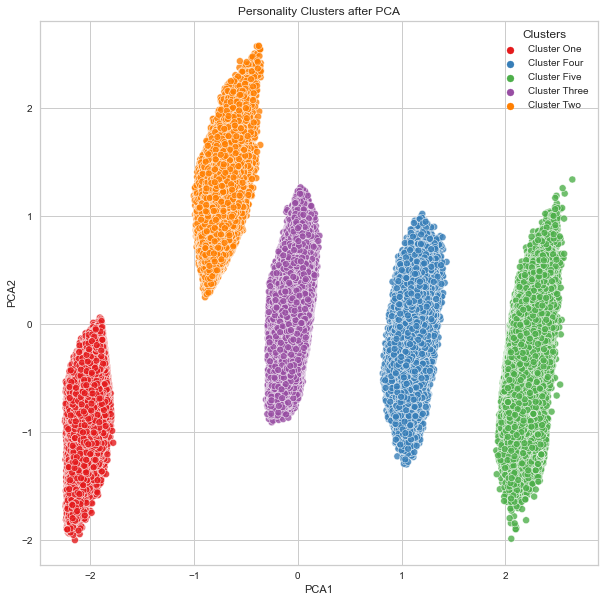

In [41]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set1', alpha=0.8)
plt.title('Personality Clusters after PCA')
plt.savefig("Personality clusters seaborn.png")


The above plot shows that our model has categorized how our given population orients itself and how it behaves as a virtue of what combination of each trait the individual possesses. The fact that each cluster is broad at the middle and narrow at its ends, is very insightful analytically. This means that for every given combination, the majority of people are located at the normalities of that combination, and very few individuals at the extremeties. This is reminiscent of the famous Normal Distribution bell curve that we are familiar with. 

## Another approach
Now, instead of feeding the model raw data to cluster, we are going to manually calculate the score for each participant. Since some datapoints negatively affect the trait, the particular columns are extracted and reversed in its marking. Each score is calculated by adding the positive and negative score. 

In [42]:
ext_neg_list = ['EXT2','EXT4','EXT6','EXT8','EXT10']
est_neg_list = ['EST2','EST4']
agr_neg_list = ['AGR1','AGR3','AGR5','AGR7']
csn_neg_list = ['CSN2','CSN4','CSN6','CSN8']
opn_neg_list = ['OPN2','OPN4','OPN6']

In [43]:
ext_neg = data_ques[ext_neg_list]
est_neg = data_ques[est_neg_list]
agr_neg = data_ques[agr_neg_list]
csn_neg = data_ques[csn_neg_list]
opn_neg = data_ques[opn_neg_list]


In [44]:
ext_neg = ext_neg.replace({1:5,2:4,4:2,5:1})
est_neg = est_neg.replace({1:5,2:4,4:2,5:1})
agr_neg = agr_neg.replace({1:5,2:4,4:2,5:1})
csn_neg = csn_neg.replace({1:5,2:4,4:2,5:1})
opn_neg = opn_neg.replace({1:5,2:4,4:2,5:1})


In [45]:
data_ques.drop(ext_neg,axis = 1,inplace = True)
data_ques.drop(est_neg,axis = 1,inplace = True)
data_ques.drop(agr_neg,axis = 1,inplace = True)
data_ques.drop(csn_neg,axis = 1,inplace = True)
data_ques.drop(opn_neg,axis = 1,inplace = True)

data_ques["ext_pos_score"] = data_ques.iloc[:,:5].sum(axis = 1)
data_ques["est_pos_score"] = data_ques.iloc[:,5:13].sum(axis = 1)
data_ques["agr_pos_score"] = data_ques.iloc[:,13:19].sum(axis = 1)
data_ques["csn_pos_score"] = data_ques.iloc[:,19:25].sum(axis = 1)
data_ques["opn_pos_score"] = data_ques.iloc[:,25:32].sum(axis = 1)


pd.set_option('display.max_columns', None)


data_ques


,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST5,EST6,EST7,EST8,EST9,EST10,AGR2,AGR4,AGR6,AGR8,AGR9,AGR10,CSN1,CSN3,CSN5,CSN7,CSN9,CSN10,OPN1,OPN3,OPN5,OPN7,OPN8,OPN9,OPN10,ext_pos_score,est_pos_score,agr_pos_score,csn_pos_score,opn_pos_score
0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,2.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,4.0,5.0,23.0,18.0,23.0,20.0,30.0
1,3.0,3.0,3.0,2.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,3.0,1.0,4.0,5.0,5.0,4.0,5.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,1.0,4.0,3.0,4.0,2.0,5.0,3.0,12.0,17.0,26.0,22.0,22.0
2,2.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,5.0,2.0,4.0,5.0,3.0,4.0,4.0,12.0,20.0,23.0,19.0,27.0
3,2.0,2.0,4.0,2.0,1.0,3.0,3.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,2.0,1.0,4.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,11.0,22.0,23.0,14.0,26.0
4,3.0,3.0,5.0,3.0,3.0,1.0,5.0,1.0,1.0,1.0,1.0,3.0,2.0,5.0,5.0,3.0,5.0,5.0,3.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,17.0,15.0,26.0,28.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,4.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,3.0,3.0,2.0,4.0,4.0,4.0,2.0,2.0,4.0,18.0,27.0,25.0,19.0,22.0
1015337,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,4.0,5.0,5.0,3.0,4.0,5.0,4.0,18.0,36.0,24.0,16.0,30.0
1015338,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,4.0,1.0,5.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,1.0,1.0,1.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,21.0,22.0,23.0,14.0,33.0
1015339,2.0,3.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,2.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0,5.0,3.0,10.0,28.0,22.0,22.0,29.0


In [46]:
ext_neg["ext_neg_score"] = ext_neg.sum(axis = 1)
est_neg["est_neg_score"] = est_neg.sum(axis = 1)
agr_neg["agr_neg_score"] = agr_neg.sum(axis = 1)
csn_neg["csn_neg_score"] = csn_neg.sum(axis = 1)
opn_neg["opn_neg_score"] = opn_neg.sum(axis = 1)

alljoins = [ext_neg,est_neg,agr_neg,csn_neg,opn_neg]
data_ques_neg = pd.concat(alljoins,axis = 1)
data_ques_neg

,EXT2,EXT4,EXT6,EXT8,EXT10,ext_neg_score,EST2,EST4,est_neg_score,AGR1,AGR3,AGR5,AGR7,agr_neg_score,CSN2,CSN4,CSN6,CSN8,csn_neg_score,OPN2,OPN4,OPN6,opn_neg_score
0,5.0,4.0,5.0,4.0,5.0,23.0,2.0,4.0,6.0,4.0,4.0,4.0,4.0,16.0,2.0,4.0,2.0,4.0,12.0,5.0,5.0,5.0,15.0
1,1.0,2.0,3.0,1.0,1.0,8.0,3.0,5.0,8.0,5.0,5.0,5.0,3.0,18.0,4.0,3.0,5.0,3.0,15.0,4.0,4.0,5.0,13.0
2,3.0,2.0,4.0,3.0,1.0,13.0,2.0,4.0,6.0,5.0,5.0,4.0,5.0,19.0,4.0,4.0,3.0,4.0,15.0,5.0,5.0,4.0,14.0
3,4.0,3.0,4.0,2.0,2.0,15.0,3.0,4.0,7.0,4.0,3.0,4.0,4.0,15.0,2.0,2.0,4.0,3.0,11.0,4.0,4.0,5.0,13.0
4,3.0,3.0,3.0,1.0,2.0,12.0,1.0,3.0,4.0,5.0,5.0,5.0,5.0,20.0,5.0,5.0,5.0,5.0,20.0,5.0,5.0,5.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,3.0,3.0,3.0,3.0,16.0,3.0,3.0,6.0,1.0,4.0,4.0,4.0,13.0,3.0,3.0,2.0,4.0,12.0,4.0,3.0,4.0,11.0
1015337,3.0,3.0,3.0,2.0,3.0,14.0,3.0,5.0,8.0,4.0,5.0,3.0,3.0,15.0,4.0,2.0,3.0,3.0,12.0,5.0,5.0,5.0,15.0
1015338,4.0,3.0,5.0,4.0,2.0,18.0,4.0,3.0,7.0,3.0,1.0,4.0,4.0,12.0,1.0,1.0,1.0,2.0,5.0,5.0,5.0,5.0,15.0
1015339,2.0,2.0,4.0,2.0,2.0,12.0,3.0,4.0,7.0,4.0,4.0,3.0,4.0,15.0,4.0,4.0,4.0,4.0,16.0,4.0,4.0,4.0,12.0


In [47]:
merger = [data_ques,data_ques_neg]

score_data = pd.concat(merger,axis = 1)

score_data["Extroversion"] = (score_data["ext_pos_score"]+ score_data["ext_neg_score"])
score_data["Neuroticism"] = (score_data["est_pos_score"]+ score_data["est_neg_score"])
score_data["Agreeableness"] = (score_data["agr_pos_score"]+ score_data["agr_neg_score"])
score_data["Conscientiousness"] = (score_data["csn_pos_score"]+ score_data["csn_neg_score"])
score_data["Openness"] = (score_data["opn_pos_score"]+ score_data["opn_neg_score"])


In [48]:
score_data_only = (score_data.iloc[:,-5:])/50
score_data_pca_ready = score_data_only
score_data_only

,Extroversion,Neuroticism,Agreeableness,Conscientiousness,Openness
0,0.92,0.48,0.78,0.64,0.90
1,0.40,0.50,0.88,0.74,0.70
2,0.50,0.52,0.84,0.68,0.82
3,0.52,0.58,0.76,0.50,0.78
4,0.58,0.38,0.92,0.96,0.96
...,...,...,...,...,...
1015336,0.68,0.66,0.76,0.62,0.66
1015337,0.64,0.88,0.78,0.56,0.90
1015338,0.78,0.58,0.70,0.38,0.96
1015339,0.44,0.70,0.74,0.76,0.82


We run KMeans again for this calculated data. K value is still 5. The DataFrame is grouped cluster-wise. The mean scores for each cluster can be visualized using bar plots and radar charts. 

In [56]:
kmeansclus = KMeans(n_clusters = 5,random_state = 0)
prediction = kmeansclus.fit_predict(score_data_only)
score_data_only["cluster_prediction"] = prediction

In [57]:
groups = score_data_only.groupby("cluster_prediction").mean()
groups

,Extroversion,Neuroticism,Agreeableness,Conscientiousness,Openness
cluster_prediction,,,,,
0,0.419467,0.790489,0.703081,0.589352,0.746378
1,0.499205,0.586344,0.803369,0.778642,0.770754
2,0.734587,0.706937,0.794020,0.598265,0.791291
3,0.771107,0.432640,0.827077,0.749507,0.819264
4,0.476351,0.486916,0.551970,0.604315,0.711844


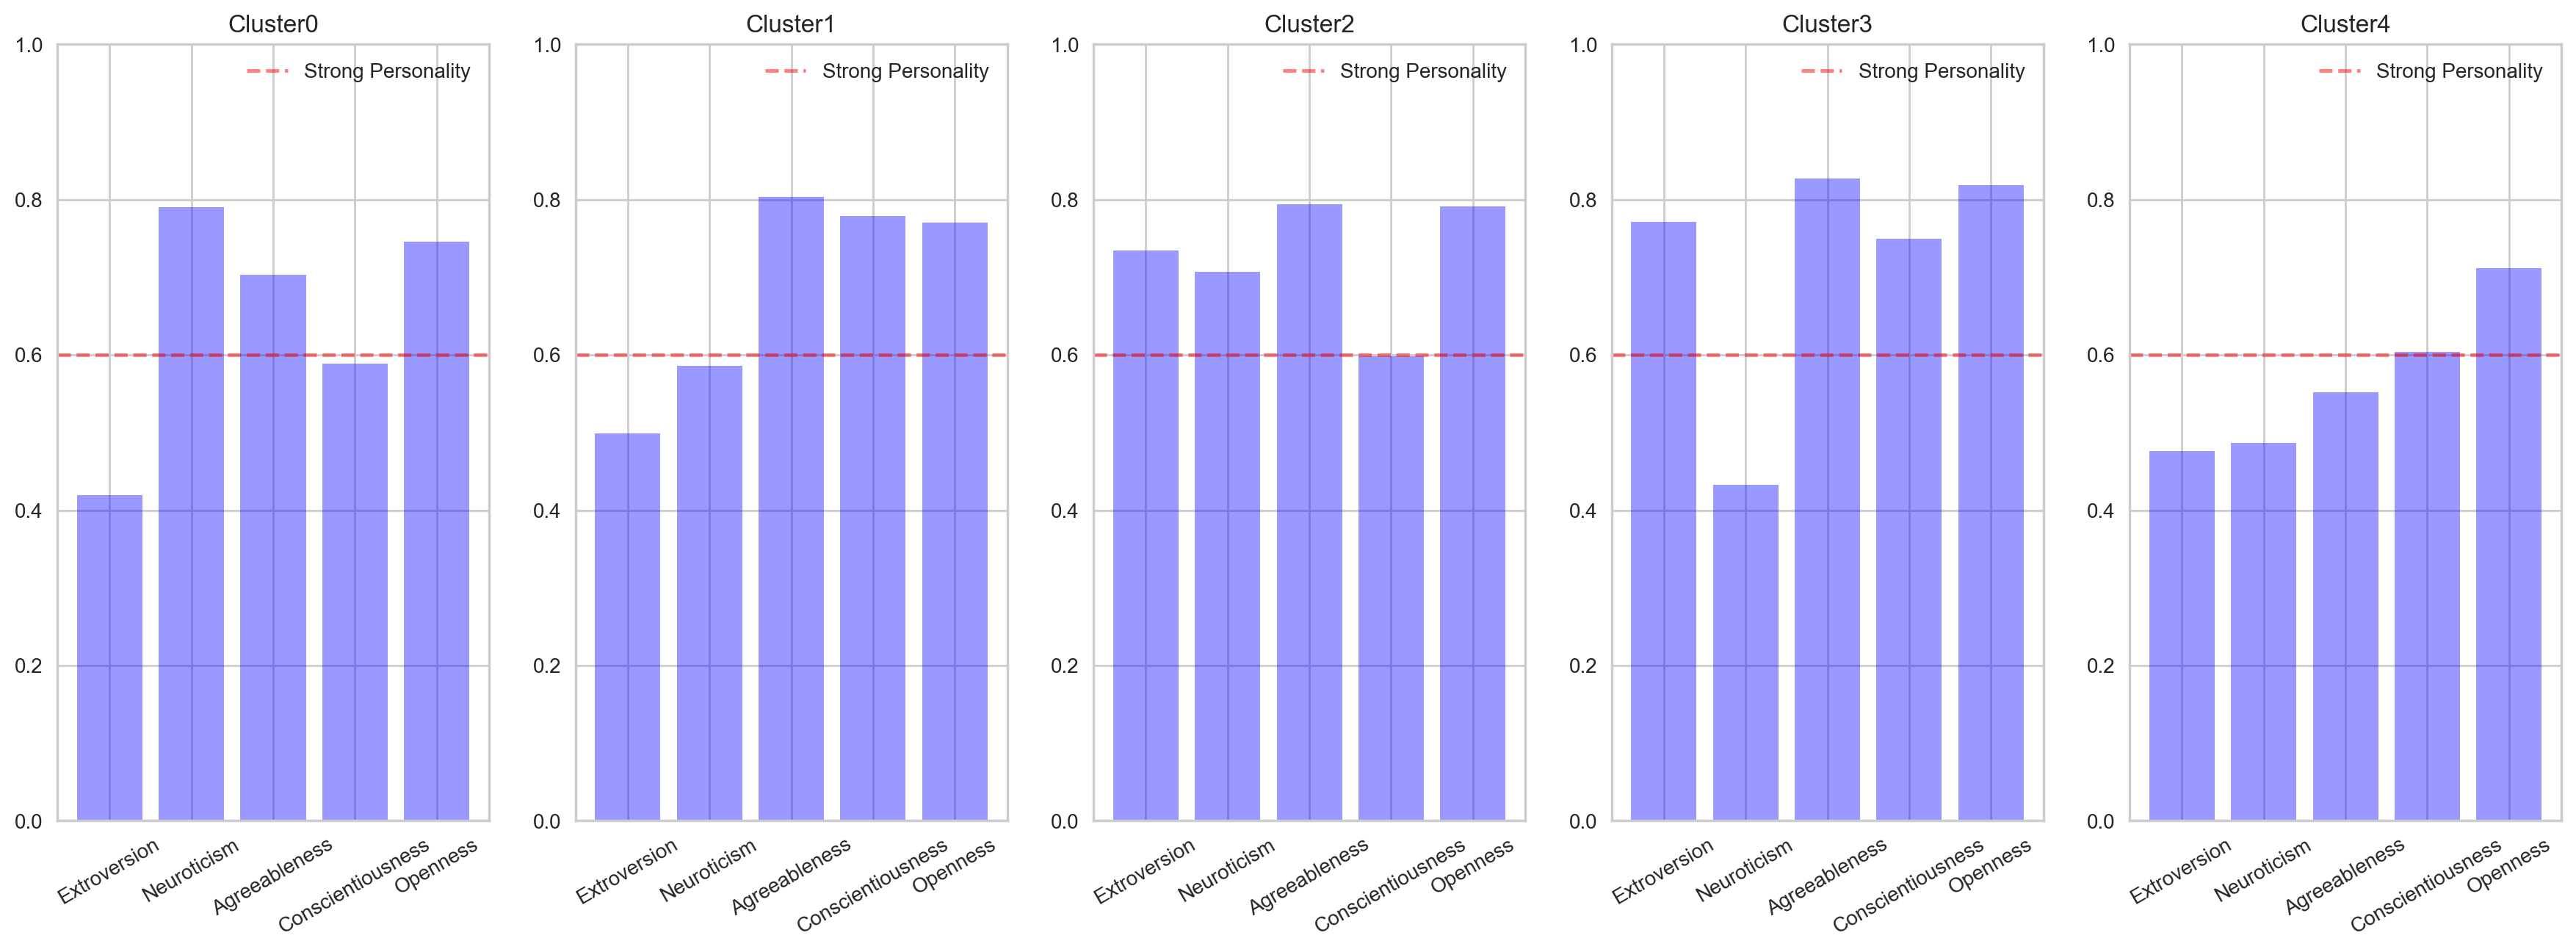

In [58]:
plt.figure(figsize = (22,7),dpi = 200)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.bar(groups.columns,groups.iloc[i,:],color = 'Blue',alpha = 0.4)
    plt.axhline(y = 0.6,color = 'red',alpha = 0.5,linestyle = "dashed",label = "Strong Personality")
    plt.ylim((0,1))
    plt.xticks(rotation = 30)
    plt.legend()
    plt.title("Cluster" + str(i))
    plt.savefig("Clustersbarchart.png")
plt.show()

In [59]:
import plotly.express as px

df0 = pd.DataFrame(dict(
    r= [0.4194,0.7904,0.703,0.5893,0.7463],
    theta=['Extroversion','Neuroticism','Agreeableness',
           'Conscientiousness', 'Openness']))
fig = px.line_polar(df0, r='r', theta='theta', line_close=True,title = "First Cluster",range_r = [0,1])
fig.show()

df1 = pd.DataFrame(dict(
    r= [0.7711,0.4326,0.827,0.7495,0.8192],
    theta=['Extroversion','Neuroticism','Agreeableness',
           'Conscientiousness', 'Openness']))
fig = px.line_polar(df1, r='r', theta='theta', line_close=True,title = "Second Cluster",range_r = [0,1])
fig.show()

df2 = pd.DataFrame(dict(
    r= [0.7345,0.7069,0.794,0.5982,0.7912],
    theta=['Extroversion','Neuroticism','Agreeableness',
           'Conscientiousness', 'Openness']))
fig = px.line_polar(df2, r='r', theta='theta', line_close=True,title = "Third Cluster",range_r = [0,1])
fig.show()

df3 = pd.DataFrame(dict(
    r= [0.4992,0.5863,0.8033,0.7786,0.7707],
    theta=['Extroversion','Neuroticism','Agreeableness',
           'Conscientiousness', 'Openness']))
fig = px.line_polar(df3, r='r', theta='theta', line_close=True,title = "Fourth Cluster",range_r = [0,1])
fig.show()

df4 = pd.DataFrame(dict(
    r= [0.4763,0.4869,0.5519,0.6043,0.7118],
    theta=['Extroversion','Neuroticism','Agreeableness',
           'Conscientiousness', 'Openness']))
fig = px.line_polar(df4, r='r', theta='theta', line_close=True,title = "Fifth Cluster",range_r = [0,1])
fig.show()

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(score_data_only)

pca_data = pd.DataFrame(data = reduced_data,columns = ["PCA1","PCA2"])

In [64]:
pca_data["Clusters"] = prediction
pca_data

,PCA1,PCA2,Clusters
0,1.147022,-0.247467,3
1,-0.874199,0.020909,1
2,-0.869826,-0.040854,1
3,-1.868064,0.033157,0
4,1.135783,-0.219588,3
...,...,...,...
1013553,0.124959,-0.012895,2
1013554,0.105435,-0.036350,2
1013555,0.137212,-0.064459,2
1013556,-0.884885,0.041690,1


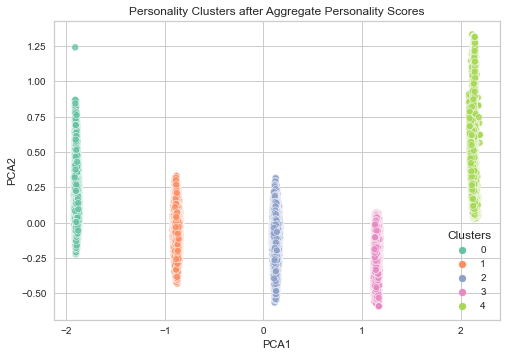

In [65]:
import seaborn as sns

sns.scatterplot(data=pca_data, x='PCA1', y='PCA2', hue='Clusters', palette = 'Set2', alpha=0.8)
plt.title('Personality Clusters after Aggregate Personality Scores')
plt.savefig("Secondseaborn.png")
plt.show()


## Inference

Since we have changed our approach to process data in both the cases, it might be the case that oversimplification of data before processing might have led to the PCA being used in a way where projecting the 5 dimensional statistic on 2 dimensions hides the variance in one of the dimensions.
The model can still calculate the farthest extremities with ease but not the width wise aspect.